# Dimensionality Reduction

Increase processing efficiency via principal components analysis

In [6]:
# import modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# process data
df = pd.read_csv('IPEDS_df.csv', low_memory=False)
# save school names
id_df = df.iloc[:, [0, 1]]
# select all numeric features
df = df.select_dtypes(include='number')
# drop any features that are >10% nan
df = df.dropna(
    thresh = round((len(df) * 0.90)),
    axis = 1)
# interpolate remaining nan values with median per feature
df = df.apply(lambda x: x.fillna(x.median()), axis = 0)
# subset to two groups for comparison
df = df[(df['DFRCGID'] == 93) | (df['TRIBAL'] == 1)]
# identify features (X) and target (y)
X = df.drop(columns=['TRIBAL'])
X = X.to_numpy()
y = df['TRIBAL']
y = y.to_numpy()
# set colormap for all the below plots
colormap = np.array(["#999999", "#E69F00", "#56B4E9"])

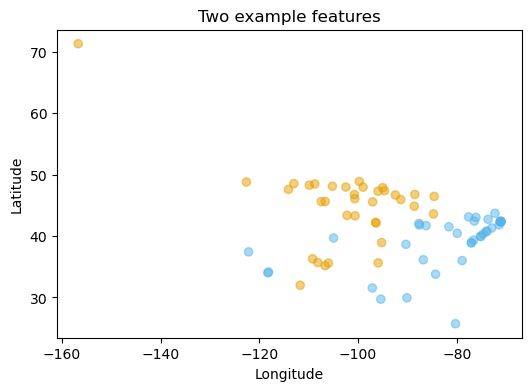

In [7]:
# plot two example features
plt.figure(figsize = (6, 4))
plt.scatter(df['LONGITUD'].to_numpy(),
            df['LATITUDE'].to_numpy(),
            c = colormap[y],
            marker = 'o',
            alpha = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Two example features")
plt.show()

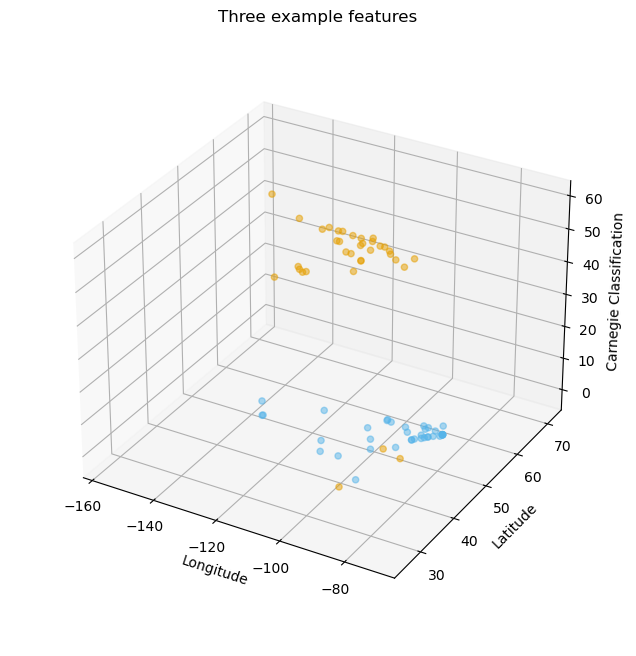

In [8]:
# plot three example features
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection = '3d')
ax.set_box_aspect(aspect = None, zoom = 0.90)
ax.scatter(df['LONGITUD'].to_numpy(),
           df['LATITUDE'].to_numpy(),
           df['CARNEGIE'].to_numpy(),
           c = colormap[y],
           marker = 'o',
           alpha = 0.5)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Carnegie Classification")
ax.set_title("Three example features")
plt.show()

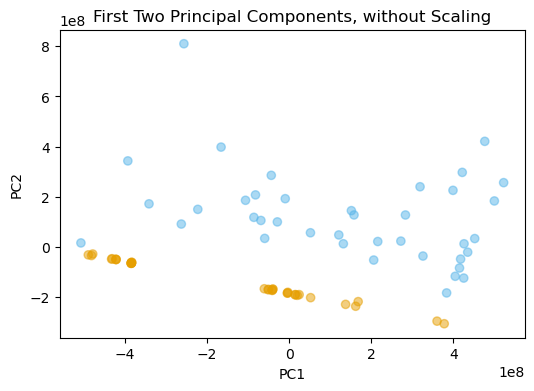

In [9]:
# plot first two principal components without scaler
pca = PCA()
Xt = pca.fit_transform(X)
plt.figure(figsize = (6, 4))
plt.scatter(Xt[:,0], Xt[:,1],
                   c = colormap[y],
                   marker = 'o',
                   alpha = 0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First Two Principal Components, without Scaling")
plt.show()

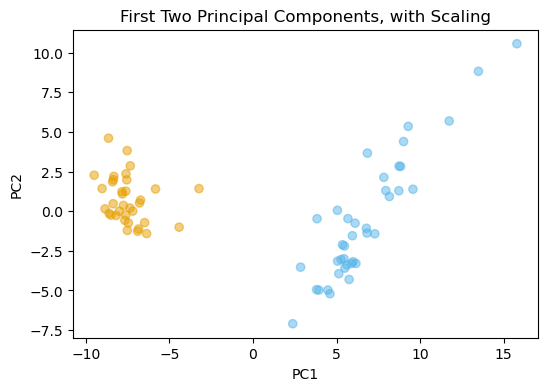

In [10]:
# plot first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plt.figure(figsize = (6, 4))
plt.scatter(Xt[:,0], Xt[:,1],
                   c = colormap[y],
                   marker = 'o',
                   alpha = 0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First Two Principal Components, with Scaling")
plt.show()